# Agrupamiento usando K-means (de OpenCV)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

La siguiente función se utiliza para generar aleatoriamente clústeres, según el número de clústeres que se indique, entre otros parámetros.

In [2]:
def generate_clusters(n_clusters, pts_range=(10, 100), kx=(1, 4), ky=(1, 3), 
                      x_offset=(0, 50), y_offset=(0, 50)):
    """
    Generación aleatoria de clusters
        n_clusters - número de clusters a ser generado
        pts_range - rango para el número de puntos por clúster
        kx - rango para el multiplicador que modifica el tamaño del cluster en x
        ky - rango para el multiplicador que modifica el tamaño del cluster en y
        x_offset = rango para la posición del cluster en x
        y_offset = rango para la posición del cluster en y
        
    """
    # Generar valores aleatorios dados los rangos
    n_pts = np.random.randint(pts_range[0], pts_range[1], n_clusters)
    kxs = np.random.randint(kx[0], kx[1], n_clusters)
    kys = np.random.randint(ky[0], ky[1], n_clusters)
    x_offsets = np.random.randint(x_offset[0], x_offset[1], n_clusters)
    y_offsets = np.random.randint(y_offset[0], y_offset[1], n_clusters)
    # Inicializar listas que contendrán los clusters
    clusters_x = []
    clusters_y = []
    # Generar clusteres aleatorios dados los valores de los parámetros
    for idx, npts in enumerate(n_pts):
        xpts = np.random.randn(npts) * kxs[idx] + x_offsets[idx]
        ypts = np.random.randn(npts) * kys[idx] + y_offsets[idx]
        clusters_x.append(xpts)
        clusters_y.append(ypts)
    # Retornar coordenadas de los clusters
    return clusters_x, clusters_y

A modo de prueba, se genera una cantidad determinada de clústeres (con coordenadas almacenadas en `real_clusters_x` y `real_clusters_y`). Luego se mezclan todos los puntos (de modo que ya no es identificable a qué cluster pertenecían) y se les adapta al formato requerido por OpenCV (npuntos, 2)

In [3]:
# Generar clusters
n_clusters = 7
real_clusters_x, real_clusters_y = generate_clusters(n_clusters)

# Convertir a arreglo de tamaño (npuntos, 2) para usarlo en OpenCV
data = np.float32((np.concatenate(real_clusters_x), np.concatenate(real_clusters_y))).transpose()

# Mostrar algunos datos de prueba
print(data[:10])

[[38.156994   -2.3331957 ]
 [38.277725   -0.38724142]
 [40.533123   -0.52068657]
 [40.130856    1.219663  ]
 [38.9754      1.8022325 ]
 [40.519115   -0.5874638 ]
 [40.507786    0.85427785]
 [38.052628   -0.45737687]
 [38.506752   -1.0533528 ]
 [39.077366    0.9893369 ]]


Se aplica el algoritmo de k-means utilizando la función [`cv2.kmeans`](https://docs.opencv.org/3.4/d5/d38/group__core__cluster.html#ga9a34dc06c6ec9460e90860f15bcd2f88). Nótese que a esta función ingresan los datos "mezclados"; es decir, datos que no contienen ninguna indicación explícita de a qué cluster pertenecen.

In [4]:
# Máximo número de iteraciones
max_iter = 5
# Criterio de exactitud
epsilon = 1.0
# Criterios en formato de OpenCV
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, max_iter, epsilon)

# Número de clusters
k_clusters = 7

# Algoritmo de K-means
compactness, label, center = cv2.kmeans(data, k_clusters, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Extracción de clusters a partir de K-means
k_clusters_x = []
k_clusters_y = []
for idx in range (k_clusters):
    k_clusters_x.append(data[label.ravel()==idx][:,0])
    k_clusters_y.append(data[label.ravel()==idx][:,1])

Gráfico que muestra los clústeres originales y los clústeres identificados con k-means.

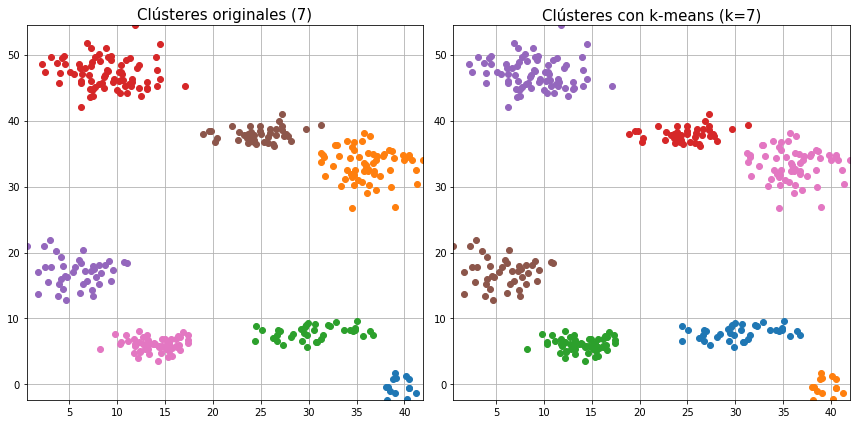

In [5]:
# Rango de los datos
min_x = np.min(data[:, 0])
max_x = np.max(data[:, 0])
min_y = np.min(data[:, 1])
max_y = np.max(data[:, 1])

# Nueva figura
fig = plt.figure(figsize=(12,6))

# Gráfico de comparación de los clústeres reales
plt.subplot(121)
for idx, xpts in enumerate(real_clusters_x): 
    plt.plot(xpts, real_clusters_y[idx], 'o')
plt.xlim(min_x, max_x); plt.ylim(min_y, max_y); plt.grid()
plt.title('Clústeres originales ({})'.format(n_clusters), fontsize=15)

# Gráfico de los clústeres obtenidos con k-means
plt.subplot(122)
for idx, xpts in enumerate(k_clusters_x):
    plt.plot(xpts, k_clusters_y[idx], 'o')
plt.xlim(min_x, max_x); plt.ylim(min_y, max_y); plt.grid()
plt.title('Clústeres con k-means (k={})'.format(k_clusters), fontsize=15)

fig.tight_layout()
plt.show()